In [43]:
import sympy as sp
import numpy as np

# 함수 1
- Example 4.2 
- p.58
- $x[0]^2+x[0]*x[1]+x[1]^2$
- 이 다변량 함수에 대해 종료 조건에 따라 계산 어떻게 달라졌는지 비교하기
- backtracking line search | strong backtracking 각각 해보기!

**backtracking line search**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [89]:
# backtracking_line_search algorithm

def backtracking_line_search(f,grads,x,d,alpha=10,p=0.5,beta=1E-4):
    y,g=f(x),grads(x)
    i=1
    while f(x+alpha*d)>y+beta*alpha*np.dot(g,d):
        alpha*=p
        print('%d: alpha= %.4f' %(i,alpha))
        i+=1
        
    return alpha

In [90]:
# f 함수 작성
def f(x):
    y=x[0]**2+x[0]*x[1]+x[1]**2
    return y


x=sp.IndexedBase('x') # x심볼 생성
gradients=np.array([sp.diff(f(x),x[i]) for i in range(2)]) # 편미분
grads=sp.lambdify(x,gradients,'numpy') # 주어진 값에서 gradient 계산 가능하게 하는 함수

In [91]:
# 종료조건 : abstol
x_=np.array([1,2]) # design point
d_=-1*np.array(grads(x_)) #descent direction
alpha=backtracking_line_search(f,grads,x_,d_)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1 0.625 [-1.5   -1.125] 5.203125 1.796875
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
2 0.625 [1.078125 1.21875 ] 3.961669921875 1.241455078125
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
3 0.625 [-1.03125    -0.97851562] 3.0300636291503906 0.9316062927246094
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
4 0.625 [0.86938477 0.88916016] 2.3194579482078552 0.7106056809425354
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5 0.625 [-0.77307129 -0.76565552] 1.7757738875225186 0.5436840606853366
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
6 0.625 [0.67180252 0.67458344] 1.3595682898740051 0.4162055976485135
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
7 0.625 [-0.58956528 -0.58852243] 1.0409182635778507 0.31865002629615446

In [92]:
# 종료조건 : reltol

x_=np.array([1,2])
d_= -1*np.array(grads(x_))
alpha=backtracking_line_search(f,grads,x_,d_)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8*(np.abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1 0.625 [-1.5   -1.125] 5.203125 1.796875
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
2 0.625 [1.078125 1.21875 ] 3.961669921875 1.241455078125
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
3 0.625 [-1.03125    -0.97851562] 3.0300636291503906 0.9316062927246094
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
4 0.625 [0.86938477 0.88916016] 2.3194579482078552 0.7106056809425354
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5 0.625 [-0.77307129 -0.76565552] 1.7757738875225186 0.5436840606853366
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
6 0.625 [0.67180252 0.67458344] 1.3595682898740051 0.4162055976485135
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
7 0.625 [-0.58956528 -0.58852243] 1.0409182635778507 0.31865002629615446

In [93]:
# 종료조건: maximum iteration

x_=np.array([1,2])
d_= -1*np.array(grads(x_))
alpha=backtracking_line_search(f,grads,x_,d_)

y_prev=f(x_)
max_iter=(141+72)*0.5

flag=True

i=1
while flag:
    x_=x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_)
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if i>max_iter:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1 0.625 [-1.5   -1.125] 5.203125 1.796875
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
2 0.625 [1.078125 1.21875 ] 3.961669921875 1.241455078125
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
3 0.625 [-1.03125    -0.97851562] 3.0300636291503906 0.9316062927246094
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
4 0.625 [0.86938477 0.88916016] 2.3194579482078552 0.7106056809425354
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5 0.625 [-0.77307129 -0.76565552] 1.7757738875225186 0.5436840606853366
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
6 0.625 [0.67180252 0.67458344] 1.3595682898740051 0.4162055976485135
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
7 0.625 [-0.58956528 -0.58852243] 1.0409182635778507 0.31865002629615446

**strong backtracking**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [94]:
def strong_backtracking(f,grads,x,d,alpha=10,beta=1E-4,sigma=1E-1):
    y0,g0,y_prev,alpha_prev=f(x), np.dot(grads(x),d), np.nan, 0.0
    alpha_lo,alpha_hi=np.nan, np.nan
    
    # bracket phase
    while True:
        y=f(x+alpha*d)
        
        if y>y0+beta*alpha*g0 or (not(np.isnan(y_prev)) and y>=y_prev):
            alpha_lo, alpha_hi =alpha_prev, alpha
            break
            
        g=np.dot(grads(x+alpha*d),d)
        
        if np.abs(g) <= -sigma*g0:
            return alpha
        elif g>=0:
            alpha_lo,alpha_hi =alpha,alpha_prev
            break
        
        y_prev,alpha_prev,alpha = y, alpha, 2*alpha
        
    # Zoom phase
    y_lo=f(x+alpha_lo*d)
    
    while True:
        alpha=0.5*(alpha_lo+alpha_hi)
        y=f(x+alpha*d)
        
        if (y>y0+beta*alpha*g0) or (y>=y_lo):
            alpha_hi=alpha
            
        else:
            g=np.dot(grads(x+alpha*d),d)
            
            if abs(g)<= -sigma*g0:
                return alpha
            elif g*(alpha_hi-alpha_lo)>=0.0:
                alpha_hi=alpha_lo
            alpha_lo=alpha

In [95]:
# abstol 종료 조건 사용

x_= np.array([1,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1



1 0.546875 [-0.25    0.4375] 0.14453125 6.85546875
2 0.46875 [-0.21582031  0.09570312] 0.03508281707763672 0.10944843292236328
3 0.546875 [-0.05834961  0.10714722] 0.008633204735815525 0.026449612341821194
4 0.46875 [-0.05312586  0.02186489] 0.00213883917763269 0.006494365558182835
5 0.46875 [-0.01356953  0.0262693 ] 0.0005177462848664494 0.0016210928927662405
6 0.625 [-0.01316183  0.00800255] 0.00013194639335377466 0.0003857998915126747
7 0.390625 [-0.00171114  0.00622551] 3.1032232332237694e-05 0.00010091416102153697
8 0.78125 [-0.00280615  0.00203024] 6.2991958037507955e-06 2.47330365284869e-05
9 0.390625 [-7.66753794e-06  1.05029318e-03] 1.0951213888046544e-06 5.204074414946141e-06
10 0.546875 [-0.00041195  0.00023275] 1.2799267457598612e-07 9.671287142286682e-07
11 0.46875 [-8.86632576e-05  2.03464079e-04] 3.121901659469553e-08 9.67736579812906e-08
12 0.546875 [-1.00915241e-04  5.42774069e-05] 7.652505103132323e-09 2.3566511491563204e-08
13 0.46875 [-2.02221531e-05  5.00995153e-05

In [96]:
# reltol 종료 조건 사용 

x_= np.array([1,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1 0.546875 [-0.25    0.4375] 0.14453125 6.85546875
2 0.46875 [-0.21582031  0.09570312] 0.03508281707763672 0.10944843292236328
3 0.546875 [-0.05834961  0.10714722] 0.008633204735815525 0.026449612341821194
4 0.46875 [-0.05312586  0.02186489] 0.00213883917763269 0.006494365558182835
5 0.46875 [-0.01356953  0.0262693 ] 0.0005177462848664494 0.0016210928927662405
6 0.625 [-0.01316183  0.00800255] 0.00013194639335377466 0.0003857998915126747
7 0.390625 [-0.00171114  0.00622551] 3.1032232332237694e-05 0.00010091416102153697
8 0.78125 [-0.00280615  0.00203024] 6.2991958037507955e-06 2.47330365284869e-05
9 0.390625 [-7.66753794e-06  1.05029318e-03] 1.0951213888046544e-06 5.204074414946141e-06
10 0.546875 [-0.00041195  0.00023275] 1.2799267457598612e-07 9.671287142286682e-07
11 0.46875 [-8.86632576e-05  2.03464079e-04] 3.121901659469553e-08 9.67736579812906e-08
12 0.546875 [-1.00915241e-04  5.42774069e-05] 7.652505103132323e-09 2.3566511491563204e-08
13 0.46875 [-2.02221531e-05  5.00995153e-05

In [97]:
# maximum iteration 종료 조건 사용

x_= np.array([1,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

max_iter=(25+13)*0.5
flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if i>max_iter:
        flag=False
        
    y_prev=y_
    i+=1

1 0.546875 [-0.25    0.4375] 0.14453125 6.85546875
2 0.46875 [-0.21582031  0.09570312] 0.03508281707763672 0.10944843292236328
3 0.546875 [-0.05834961  0.10714722] 0.008633204735815525 0.026449612341821194
4 0.46875 [-0.05312586  0.02186489] 0.00213883917763269 0.006494365558182835
5 0.46875 [-0.01356953  0.0262693 ] 0.0005177462848664494 0.0016210928927662405
6 0.625 [-0.01316183  0.00800255] 0.00013194639335377466 0.0003857998915126747
7 0.390625 [-0.00171114  0.00622551] 3.1032232332237694e-05 0.00010091416102153697
8 0.78125 [-0.00280615  0.00203024] 6.2991958037507955e-06 2.47330365284869e-05
9 0.390625 [-7.66753794e-06  1.05029318e-03] 1.0951213888046544e-06 5.204074414946141e-06
10 0.546875 [-0.00041195  0.00023275] 1.2799267457598612e-07 9.671287142286682e-07
11 0.46875 [-8.86632576e-05  2.03464079e-04] 3.121901659469553e-08 9.67736579812906e-08
12 0.546875 [-1.00915241e-04  5.42774069e-05] 7.652505103132323e-09 2.3566511491563204e-08
13 0.46875 [-2.02221531e-05  5.00995153e-05

# 함수2
- Example 4.1
- $sin(x[0]*x[1])+exp(x[1]+x[2])-x[2]$

**backtracking line search**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [98]:
def f(x):
    return sp.sin(x[0]*x[1])+sp.exp(x[1]+x[2])-x[2]


x=sp.IndexedBase('x') # x심볼 생성
gradients=np.array([sp.diff(f(x),x[i]) for i in range(3)]) # 편미분
grads=sp.lambdify(x,gradients,'numpy') # 주어진 값에서 gradient 계산 가능하게 하는 함수

In [99]:
f(np.array([1,-1.13,-0.13]))

-0.490758162879055

In [100]:
f(np.array([1-3.14,-1.13-3.14,-0.13-3.14]))

3.55358647079020

In [101]:
# 종료방법 : abstol

x_=np.array([1,2,3])
d_=-1*np.array(grads(x_))
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.1)

y_prev=f(x_)
flag=True

i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.1)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1

1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
1 0.0125 [  1.08322937 -12.79970123 -11.74131591] 10.7781219715061 -13.7781219715061 + sin(2) + exp(5)
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
2 0.0125 [  1.12623755 -12.80334098 -11.72881591] 10.7684366558792 0.00968531562689634
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
3 0.0125 [  1.08163449 -12.7994175  -11.71631591] 10.7588982629102 0.00953839296896852
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
4 0.0125 [  1.12782543 -12.80332093 -11.70381591] 10.7492939153846 0.00960434752563266
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
5 0.0125 [  1.08011057 -12.7991178  -11.69131591] 10.7398108552025 0.00948306018209344
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
6 0.0125 [  1.12932848 -12.80327128 -11.67881591] 10.7301899725039 0.00962088269855599
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
7 0.0125 [  1.07869157 -12.79880479 -11.66631591] 10.7206644341146 0.00952553838930292
1: alpha= 0.0500
2

1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
72 0.0125 [  1.55257702 -12.82398193 -10.76631591] 9.89363612262924 0.0121916745849138
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
73 0.0125 [  1.63085027 -12.83345833 -10.75381591] 9.88063080824383 0.0130053143854081
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
74 0.0125 [  1.55266423 -12.82352261 -10.74131591] 9.86843833832972 0.0121924699141189
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
75 0.0125 [  1.63087799 -12.83299268 -10.72881591] 9.85543411773178 0.0130042205979386
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
76 0.0125 [  1.55275134 -12.82306397 -10.71631591] 9.84324084892328 0.0121932688084954
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
77 0.0125 [  1.63090564 -12.83252772 -10.70381591] 9.83023771520439 0.0130031337188896
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
78 0.0125 [  1.55283835 -12.82260603 -10.69131591] 9.81804364570699 0.0121940694973990
1: alpha= 0.0500
2: alpha= 0.0250


3: alpha= 0.0125
145 0.0125 [  1.63180781 -12.8171227   -9.85381591] 8.97371832577584 0.0129677494849023
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
146 0.0125 [  1.55573933 -12.80743807  -9.84131591] 8.96149788878766 0.0122204369881782
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
147 0.0125 [  1.63183323 -12.81668131  -9.82881591] 8.94853114333014 0.0129667454575202
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
148 0.0125 [  1.55582299 -12.80700361  -9.81631591] 8.93630996200451 0.0122211813256339
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
149 0.0125 [  1.6318586  -12.81624058  -9.80381591] 8.92334421855586 0.0129657434486532
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
150 0.0125 [  1.55590655 -12.80656981  -9.79131591] 8.91112229465817 0.0122219238976840
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
151 0.0125 [  1.6318839  -12.81580051  -9.77881591] 8.89815755120338 0.0129647434547877
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
152 0.0125

3: alpha= 0.0125
206 0.0125 [  1.55820852 -12.7946864   -9.09131591] 8.20597191060815 0.0122420135421084
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
207 0.0125 [  1.63256748 -12.80374225  -9.07881591] 8.19303436298951 0.0129375476186375
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
208 0.0125 [  1.55828939 -12.79427127  -9.06631591] 8.18079165653716 0.0122427064523549
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
209 0.0125 [  1.63259102 -12.8033209   -9.05381591] 8.16785505198321 0.0129366045539463
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
210 0.0125 [  1.55837017 -12.79385677  -9.04131591] 8.15561165428099 0.0122433977022283
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
211 0.0125 [  1.6326145  -12.80290019  -9.02881591] 8.14267599087993 0.0129356634010520
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
212 0.0125 [  1.55845086 -12.7934429   -9.01631591] 8.13043190358478 0.0122440872951515
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
213 0.0125

2: alpha= 0.0250
3: alpha= 0.0125
279 0.0125 [  1.63337809 -12.78896711  -8.17881591] 7.28673480802619 0.0129047778708120
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
280 0.0125 [  1.56114036 -12.77974107  -8.16631591] 7.27446823639182 0.0122665716343668
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
281 0.0125 [  1.63339955 -12.78856806  -8.15381591] 7.26156433485737 0.0129039015344556
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
282 0.0125 [  1.56121789 -12.77934878  -8.14131591] 7.24929712951015 0.0122672053472161
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
283 0.0125 [  1.63342094 -12.78816963  -8.12881591] 7.23639410251911 0.0129030269910393
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
284 0.0125 [  1.56129534 -12.77895709  -8.11631591] 7.22412626499641 0.0122678375227050
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
285 0.0125 [  1.63344229 -12.78777179  -8.10381591] 7.21122411075907 0.0129021542373353
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 

KeyboardInterrupt: 

In [39]:
# 종료 반복: reltol
# abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)

x_=np.array([1,2,3])
d_=-1*np.array(grads(x_))
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.1)

y_prev=f(x_)
flag=True

i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.1)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
1 0.0125 [  1.08322937 -12.79970123 -11.74131591] 10.7781219715061 -13.7781219715061 + sin(2) + exp(5)
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
2 0.0125 [  1.12623755 -12.80334098 -11.72881591] 10.7684366558792 0.00968531562689634
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
3 0.0125 [  1.08163449 -12.7994175  -11.71631591] 10.7588982629102 0.00953839296896852
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
4 0.0125 [  1.12782543 -12.80332093 -11.70381591] 10.7492939153846 0.00960434752563266
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
5 0.0125 [  1.08011057 -12.7991178  -11.69131591] 10.7398108552025 0.00948306018209344
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
6 0.0125 [  1.12932848 -12.80327128 -11.67881591] 10.7301899725039 0.00962088269855599
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
7 0.0125 [  1.07869157 -12.79880479 -11.66631591] 10.7206644341146 0.00952553838930292
1: alpha= 0.0500
2

3: alpha= 0.0125
77 0.0125 [  1.63090564 -12.83252772 -10.70381591] 9.83023771520439 0.0130031337188896
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
78 0.0125 [  1.55283835 -12.82260603 -10.69131591] 9.81804364570699 0.0121940694973990
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
79 0.0125 [  1.63093324 -12.83206344 -10.67881591] 9.80504159350645 0.0130020522005410
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
80 0.0125 [  1.55292526 -12.82214876 -10.66631591] 9.79284672271859 0.0121948707878605
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
81 0.0125 [  1.63096076 -12.83159985 -10.65381591] 9.77984574772116 0.0130009749974356
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
82 0.0125 [  1.55301207 -12.82169218 -10.64131591] 9.76765007584521 0.0121956718759488
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
83 0.0125 [  1.63098823 -12.83113695 -10.62881591] 9.75465017444268 0.0129999014025319
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
84 0.0125 [  1.55

3: alpha= 0.0125
136 0.0125 [  1.55531962 -12.80962024  -9.96631591] 9.08744142311208 0.0122166886943091
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
137 0.0125 [  1.63170548 -12.81889486  -9.95381591] 9.07446963726220 0.0129717858498761
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
138 0.0125 [  1.55540375 -12.80918249  -9.94131591] 9.06225219534960 0.0122174419126040
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
139 0.0125 [  1.63173115 -12.81845083  -9.92881591] 9.04928142163633 0.0129707737132740
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
140 0.0125 [  1.55548779 -12.80874539  -9.91631591] 9.03706322828878 0.0122181933475449
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
141 0.0125 [  1.63175677 -12.81800746  -9.90381591] 9.02409346467952 0.0129697636092612
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
142 0.0125 [  1.55557173 -12.80830896  -9.89131591] 9.01187452167679 0.0122189430027255
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
143 0.0125

3: alpha= 0.0125
216 0.0125 [  1.55861196 -12.79261706  -8.96631591] 8.08007315585270 0.0122454615238059
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
217 0.0125 [  1.63268458 -12.80164183  -8.95381591] 8.06714030447328 0.0129328513794178
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
218 0.0125 [  1.55869237 -12.79220508  -8.94131591] 8.05489415830694 0.0122461461663423
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
219 0.0125 [  1.63270783 -12.80122364  -8.92881591] 8.04196224046694 0.0129319178400049
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
220 0.0125 [  1.5587727  -12.79179373  -8.91631591] 8.02971541130138 0.0122468291655586
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
221 0.0125 [  1.63273101 -12.80080608  -8.90381591] 8.01678442510582 0.0129309861955544
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
222 0.0125 [  1.55885293 -12.791383    -8.89131591] 8.00453691458098 0.0122475105248423
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
223 0.0125

1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
302 0.0125 [  1.56198837 -12.77545887  -7.89131591] 6.99759934875971 0.0122734584513386
303 0.1 [  1.63363187 -12.78421834  -7.87881591] 6.98470496929856 0.0128943794611427
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
304 0.0125 [  1.06109636 -12.71105687  -7.77881591] 6.98243611990467 0.00226884939389649
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
305 0.0125 [  1.15719145 -12.71907872  -7.76631591] 6.93053466637049 0.0519014535341800
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
306 0.0125 [  1.06989682 -12.71113658  -7.75381591] 6.89485645874938 0.0356782076211042
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
307 0.0125 [  1.15125503 -12.71798451  -7.74131591] 6.86588836298127 0.0289680957681151
1: alpha= 0.0500
2: alpha= 0.0250
3: alpha= 0.0125
308 0.0125 [  1.07441466 -12.71102878  -7.72881591] 6.84193707521998 0.0239512877612924
309 0.1 [  1.14782118 -12.71723355  -7.71631591] 6.82023814053037 0.021698934689

KeyboardInterrupt: 

# 와 여기 무한 반복 급인데?

In [80]:
# maximum iteration 종료 조건 사용

x_=np.array([1,2,3])
d_=-1*np.array(grads(x_))
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)

y_prev=f(x_)
flag=True

i=1
max_iter=500
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if i>max_iter:
        flag=False
        
    y_prev=y_
    i+=1

1: alpha= 0.2500
1 0.25 [  1.41614684 -71.99850613 -70.70657955] 69.7165464379292 -72.7165464379292 + sin(2) + exp(5)
1: alpha= 0.2500
2 0.25 [  3.95112023 -72.04836681 -70.45657955] 69.5198484934641 0.196697944465129
3 0.5 [ -2.35401049 -71.70259451 -70.20657955] 69.4504726150180 0.0693758784461096
4 0.5 [ 21.10880248 -70.93230568 -69.70657955] 68.7596113978143 0.690861217203690
5 0.5 [  9.71255479 -67.54088707 -69.20657955] 68.6433424693520 0.116268928462233
1: alpha= 0.2500
2: alpha= 0.1250
6 0.125 [-18.19180534 -63.52816769 -68.70657955] 68.3042718713061 0.339070598045964
7 0.5 [-10.92176474 -61.44633268 -68.58157955] 67.6501075507800 0.654164320526021
8 0.5 [  0.25572314 -59.45959258 -68.08157955] 67.5997251472936 0.0503824034864664
9 0.5 [-25.79504939 -59.34755372 -67.58157955] 66.7875212090134 0.812203938280163
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
8: alpha= 0.0020
9: alpha= 0.0010
10: alpha= 0.0005

6: alpha= 0.0078
7: alpha= 0.0039
8: alpha= 0.0020
9: alpha= 0.0010
63 0.0009765625 [  3.53624081 -36.15234481 -57.74930416] 56.9290234808480 0.322401036071263
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
8: alpha= 0.0020
9: alpha= 0.0010
64 0.0009765625 [  3.51604771 -36.15036962 -57.7483276 ] 56.7565183993620 0.172505081486094
1: alpha= 0.2500
65 0.25 [  3.52055691 -36.1508082  -57.74735104] 56.7480161834926 0.00850221586938460
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
8: alpha= 0.0020
9: alpha= 0.0010
66 0.0009765625 [  3.19097765 -36.11871203 -57.49735104] 56.6641202319194 0.0838959515731759
67 0.5 [  3.17147477 -36.11698901 -57.49637447] 56.5040541717333 0.160066060186132
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
8: alpha= 0.0020
9: alpha= 0.0010
68 0.00097

8: alpha= 0.0020
9: alpha= 0.0010
10: alpha= 0.0005
11: alpha= 0.0002
12: alpha= 0.0001
13: alpha= 0.0001
119 6.103515625e-05 [  99.84693756 -103.34285653  -47.9047607 ] 46.9091125626727 0.495657235813560
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
120 0.0625 [  99.84752537 -103.34342446  -47.90469967] 46.9049906649969 0.00412189767583726
121 0.5 [  99.69171722 -103.19288699  -47.84219967] 46.8964704190330 0.00852024596393619
1: alpha= 0.2500
122 0.25 [ 82.92516042 -86.99519266 -47.34219967] 46.5042179642854 0.392252454747585
1: alpha= 0.2500
123 0.25 [ 94.79344318 -98.30822297 -47.09219967] 46.2447633009951 0.259454663290292
124 0.5 [ 107.84132784 -110.88961114  -46.84219967] 45.8422545155119 0.402508785483235
125 0.5 [ 107.26063498 -110.32488115  -46.34219967] 45.5825850187171 0.259669496794722
126 0.5 [ 71.38444991 -75.44514821 -45.84219967] 45.0462374986079 0.536347520109224
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078

175 0.001953125 [ 17.05642653 -23.2956782  -33.06729732] 32.0697776879818 0.00581408750134926
176 0.5 [ 17.05962917 -23.29802308 -33.0653442 ] 32.0663192529326 0.00345843504921817
177 0.5 [ 16.54533413 -22.92143822 -32.5653442 ] 31.7883624893905 0.277956763542029
178 0.5 [  9.3305459  -17.71360263 -32.0653442 ] 31.1239202544029 0.664442234987654
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
179 0.00390625 [  6.34380774 -16.1403542  -31.5653442 ] 30.6069696187480 0.516950635654876
180 0.5 [  6.32580658 -16.13327902 -31.56143795] 30.5624846915186 0.0444849272293766
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
7: alpha= 0.0039
181 0.00390625 [  6.69479587 -16.27795852 -31.06143795] 30.2319817416556 0.330502949862986
182 0.5 [  6.65927865 -16.26335101 -31.0575317 ] 30.0609543893757 0.171027352279953
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.

1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
240 0.0078125 [ -8.04307512 -13.88706843 -23.1590942 ] 22.1732057271459 0.00783641235537758
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
241 0.0078125 [ -8.02491306 -13.87654938 -23.1512817 ] 22.1654336773092 0.00777204983671709
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
242 0.0078125 [ -8.04308717 -13.8870596  -23.1434692 ] 22.1575968570581 0.00783682025109655
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
243 0.0078125 [ -8.02491482 -13.87653456 -23.1356567 ] 22.1498245180723 0.00777233898575957
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
244 0.0078125 [ -8.04309901 -13.88705063 -23.1278442 ] 22.1419873042212 0.00783721385110425
1: alpha= 0.2500
2: alpha= 0.1

5: alpha= 0.0156
6: alpha= 0.0078
292 0.0078125 [ -8.04333495 -13.88680379 -22.7528442 ] 21.7672045148491 0.00784334410164789
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
293 0.0078125 [ -8.02501499 -13.87619273 -22.7450317 ] 21.7594273914020 0.00777712344712711
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
294 0.0078125 [ -8.04334333 -13.88679255 -22.7372192 ] 21.7515838954494 0.00784349595255307
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
295 0.0078125 [ -8.02502061 -13.87617989 -22.7294067 ] 21.7438066538236 0.00777724162585613
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
296 0.0078125 [ -8.04335162 -13.88678127 -22.7215942 ] 21.7359630120114 0.00784364181218322
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0

6: alpha= 0.0078
337 0.0078125 [ -8.02515395 -13.87591832 -22.4012817 ] 21.4157237701146 0.00777897764815805
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
338 0.0078125 [ -8.0435112  -13.88653526 -22.3934692 ] 21.4078781264363 0.00784564367828366
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
339 0.0078125 [ -8.02516084 -13.87590616 -22.3856567 ] 21.4000990929020 0.00777903353433373
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
340 0.0078125 [ -8.04351828 -13.88652323 -22.3778442 ] 21.3922533918795 0.00784570102245041
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
341 0.0078125 [ -8.02516777 -13.87589403 -22.3700317 ] 21.3844743042512 0.00777908762837853
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
342 0.0078125

2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
381 0.0078125 [ -8.02531202 -13.87565466 -22.0575317 ] 21.0719606585078 0.00777988048408318
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
382 0.0078125 [ -8.04366065 -13.88626703 -22.0497192 ] 21.0641142143357 0.00784644417207403
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
383 0.0078125 [ -8.02531944 -13.87564283 -22.0419067 ] 21.0563343051218 0.00777990921392657
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
384 0.0078125 [ -8.0436672  -13.88625471 -22.0340942 ] 21.0484878419032 0.00784646321863391
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
385 0.0078125 [ -8.02532687 -13.875631   -22.0262817 ] 21.0407079047284 0.00777993717482062
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0

5: alpha= 0.0156
6: alpha= 0.0078
425 0.0078125 [ -8.02547783 -13.87539618 -21.7137817 ] 20.7281723823890 0.00778037286622180
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
426 0.0078125 [ -8.04380194 -13.88599478 -21.7059692 ] 20.7203257151400 0.00784666724893768
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
427 0.0078125 [ -8.02548546 -13.8753845  -21.6981567 ] 20.7125453251391 0.00778039000087105
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
428 0.0078125 [ -8.04380826 -13.88598236 -21.6903442 ] 20.7046986550922 0.00784667004699813
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
429 0.0078125 [ -8.02549309 -13.87537284 -21.6825317 ] 20.6969182482836 0.00778040680855341
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0

4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
473 0.0078125 [ -8.02566195 -13.87511732 -21.3387817 ] 20.3531188847970 0.00778071470433517
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
474 0.0078125 [ -8.04395185 -13.88569659 -21.3309692 ] 20.3452722467707 0.00784663802630092
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
475 0.0078125 [ -8.02566965 -13.87510575 -21.3231567 ] 20.3374915201372 0.00778072663345597
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
476 0.0078125 [ -8.04395804 -13.88568416 -21.3153442 ] 20.3296448865237 0.00784663361352145
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6: alpha= 0.0078
477 0.0078125 [ -8.02567736 -13.87509419 -21.3075317 ] 20.3218641480902 0.00778073843349247
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0

**strong backtracking**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [103]:
def strong_backtracking(f,grads,x,d,alpha=10,beta=1E-4,sigma=1E-1):
    y0,g0,y_prev,alpha_prev=f(x), np.dot(grads(x),d), np.nan, 0.0
    alpha_lo,alpha_hi=np.nan, np.nan
    
    # bracket phase
    while True:
        y=f(x+alpha*d)
        
        if y>y0+beta*alpha*g0:
            alpha_lo, alpha_hi =alpha_prev, alpha
            break
            
        g=np.dot(grads(x+alpha*d),d)
        
        if np.abs(g) <= -sigma*g0:
            return alpha
        elif g>=0:
            alpha_lo,alpha_hi =alpha,alpha_prev
            break
        
        y_prev,alpha_prev,alpha = y, alpha, 2*alpha
        
    # Zoom phase
    y_lo=f(x+alpha_lo*d)
    
    while True:
        alpha=0.5*(alpha_lo+alpha_hi)
        y=f(x+alpha*d)
        
        if (y>y0+beta*alpha*g0) or (y>=y_lo):
            alpha_hi=alpha
            
        else:
            g=np.dot(grads(x+alpha*d),d)
            
            if abs(g)<= -sigma*g0:
                return alpha
            elif g*(alpha_hi-alpha_lo)>=0.0:
                alpha_hi=alpha_lo
            alpha_lo=alpha

In [104]:
# abstol 종료 조건 사용

x_= np.array([1,2,3])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1

1 19.76691246032715 [  1.52018355 -90.49813267 -89.13322444] 89.7434177452216 -92.7434177452216 + sin(2) + exp(5)
2 4.454612731933594 [1418.75597556 -114.3047955   -69.36631198] 68.3667060520414 21.3767116931802
3 19.892845302820206 [1404.46259046   63.10530736  -64.91169925] 64.0759475868231 4.29075846521827
4 39.88813400268555 [1401.57065843   -4.52442753  -48.28616798] 47.2861679811734 16.7897796056497
5 19.999894946813583 [ 1.40155312e+03  9.08935150e-01 -8.39803397e+00] 7.39860598787466 39.8875619932988
6 9.99911904335022 [1401.46089978 -141.30163915   11.5906781 ] -12.5906780755095 19.9892840633841
7 9.870233237743378 [1401.15251949 -138.24305526   21.58979714] -22.5897945621370 9.99911648662757
8 8.446374833583832 [1404.25237108 -169.66137752   31.46003038] -32.4600303022534 9.87023574011639
9 159.99275840818882 [1403.68576021 -164.97165575   39.90640521] -40.9064043906618 8.44637408840839
10 8.749825656414032 [1437.55576649 -453.15961929  199.89916362] -200.899163541339 159.992

83 2.236900180578232 [ 1645.80007734 -1137.68578853  1137.94618432] -1137.64874082327 3.22415871778503e-7
84 6.327319145202637 [ 1645.65874137 -1140.38358053  1137.28083292] -1138.23590731769 0.587166494423855
85 0.5961531400680542 [ 1646.26903318 -1141.54853581  1143.32389349] -1138.42146446648 0.185557148785847
86 319.47970762848854 [ 1652.13078256 -1153.52070917  1140.40131715] -1141.40131486880 2.97985040231674
87 47.62325167655945 [ 1924.40862965 -1543.49147281  1459.88038392] -1460.88038385398 319.479068985187
88 9.970776587724686 [ 1898.65549156 -1511.38273618  1507.50363559] -1508.48296603725 47.6025821832659
89 0.5664494633674622 [ 1906.84225157 -1521.87334019  1517.26832214] -1518.25832057983 9.77535454257804
90 8.515712395310402 [ 1906.60492029 -1521.58163959  1517.82910625] -1518.80564782442 0.547327244590633
91 3.1802765280008316 [ 1914.35904519 -1531.49764344  1526.14505499] -1527.14031906362 8.33467123920559
92 9.9996317923069 [ 1912.76265689 -1529.51723302  1529.3102701

165 0.009755976498126984 [ 2792.49155882 -2677.00334893  2676.23888227] -2676.77330006969 7.95591941461817
166 9.999920669943094 [ 2792.48591765 -2677.0020066   2676.24409604] -2676.77545142169 0.00215135200005534
167 3.137199655175209 [ 2795.7724639  -2685.11674099  2681.55760777] -2682.52914427203 5.75369285034503
168 1.4901161193847656e-07 [ 2794.24986936 -2683.6206948   2684.60551179] -2682.92818931717 0.399045045137882
169 1.2688964791595936 [ 2794.24986892 -2683.62069474  2684.60551154] -2682.92819015071 8.33540980238467e-7
170 9.7100168466568 [ 2795.11778641 -2687.92163478  2682.47716438] -2683.47284423679 0.544654086079845
171 1.1231061816215515 [ 2799.05059909 -2692.05323922  2692.14523271] -2692.04887500907 8.57603077227895
172 7.450580596923828e-08 [ 2798.56556338 -2692.78025156  2692.03701279] -2692.56144155355 0.512566544479796
173 10.00033751130104 [ 2798.56556329 -2692.78025151  2692.03701283] -2692.56144163340 7.98449946159963e-8
174 0.7289648801088333 [ 2797.26480832 -

245 9.96521639637649 [ 8522.10427492 -8419.8321757   5009.01452643] -5010.01452642601 39.9999988943009
246 19.99934072373435 [ 8528.97795647 -8426.78934892  5018.97974283] -5019.97974282250 9.96521639648927
247 9.999994728714228 [ 8515.40376433 -8413.05054749  5038.97908355] -5039.97908354496 19.9993407224647
248 9.939550035633147 [ 8523.39669072 -8421.14071587  5048.97907828] -5049.97907827499 9.99999473002481
249 9.999999767169356 [ 8516.69843847 -8414.36112829  5058.91862831] -5059.91862831013 9.93955003514020
250 19.285282150376588 [ 8523.93248628 -8421.68315817  5068.91862808] -5069.91862807834 9.99999976820982
251 39.52445667935535 [ 8512.09752778 -8409.70450909  5088.20391023] -5089.20391022607 19.2852821477290
252 19.140600487589836 [ 8546.32561373 -8444.3493418   5127.72836691] -5128.72836690894 39.5244566828696
253 9.980474940966815 [ 8536.65962744 -8434.56662641  5146.8689674 ] -5147.86896739181 19.1406004828750
254 9.994517182931304 [ 8546.2600525  -8444.28325616  5156.8494

324 19.92673526983708 [  9844.73106105 -10014.268953     9953.38587464] -9954.38587464329 8.74024562241902
325 39.67310547246598 [  9837.93261375 -10007.58560091   9973.31260991] -9974.31260990213 19.9267352588431
326 9.999927445314825 [  9898.33873778 -10066.96769379  10012.98571539] -10013.9857153851 39.6731054829270
327 39.68780450290069 [  9893.58956808 -10062.2980761   10022.98564283] -10023.9856428257 9.99992744064912
328 23.091406663879752 [  9936.52144602 -10104.51014102  10062.67344733] -10063.6734473329 39.6878045072117
329 39.45315951248631 [  9923.87814811 -10092.07703946  10085.764854  ] -10086.7630399294 23.0895925964560
330 3.2505148462951183 [  9961.88589872 -10129.52290714  10125.14644294] -10126.1338732158 39.3708332863953
331 2.5048105139285326 [  9960.2559651  -10127.96080594  10128.35609971] -10127.8712793770 1.73740616123723
332 2.7939677238464355e-08 [  9957.5635677  -10129.03218445  10127.14171665] -10127.9907154975 0.119436120514365
333 9.672561500919983 [  995

In [105]:
# reltol 종료 반복
x_= np.array([1,2,3])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1 19.76691246032715 [  1.52018355 -90.49813267 -89.13322444] 89.7434177452216 -92.7434177452216 + sin(2) + exp(5)
2 4.454612731933594 [1418.75597556 -114.3047955   -69.36631198] 68.3667060520414 21.3767116931802
3 19.892845302820206 [1404.46259046   63.10530736  -64.91169925] 64.0759475868231 4.29075846521827
4 39.88813400268555 [1401.57065843   -4.52442753  -48.28616798] 47.2861679811734 16.7897796056497
5 19.999894946813583 [ 1.40155312e+03  9.08935150e-01 -8.39803397e+00] 7.39860598787466 39.8875619932988
6 9.99911904335022 [1401.46089978 -141.30163915   11.5906781 ] -12.5906780755095 19.9892840633841
7 9.870233237743378 [1401.15251949 -138.24305526   21.58979714] -22.5897945621370 9.99911648662757
8 8.446374833583832 [1404.25237108 -169.66137752   31.46003038] -32.4600303022534 9.87023574011639
9 159.99275840818882 [1403.68576021 -164.97165575   39.90640521] -40.9064043906618 8.44637408840839
10 8.749825656414032 [1437.55576649 -453.15961929  199.89916362] -200.899163541339 159.992

In [106]:
# maximum iteration
x_= np.array([1,2,3])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
max_iter=(34+341)*0.5
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if i>max_iter:
        flag=False
        
    y_prev=y_
    i+=1

1 19.76691246032715 [  1.52018355 -90.49813267 -89.13322444] 89.7434177452216 -92.7434177452216 + sin(2) + exp(5)
2 4.454612731933594 [1418.75597556 -114.3047955   -69.36631198] 68.3667060520414 21.3767116931802
3 19.892845302820206 [1404.46259046   63.10530736  -64.91169925] 64.0759475868231 4.29075846521827
4 39.88813400268555 [1401.57065843   -4.52442753  -48.28616798] 47.2861679811734 16.7897796056497
5 19.999894946813583 [ 1.40155312e+03  9.08935150e-01 -8.39803397e+00] 7.39860598787466 39.8875619932988
6 9.99911904335022 [1401.46089978 -141.30163915   11.5906781 ] -12.5906780755095 19.9892840633841
7 9.870233237743378 [1401.15251949 -138.24305526   21.58979714] -22.5897945621370 9.99911648662757
8 8.446374833583832 [1404.25237108 -169.66137752   31.46003038] -32.4600303022534 9.87023574011639
9 159.99275840818882 [1403.68576021 -164.97165575   39.90640521] -40.9064043906618 8.44637408840839
10 8.749825656414032 [1437.55576649 -453.15961929  199.89916362] -200.899163541339 159.992

82 5.960464477539062e-07 [ 1645.80007794 -1137.68578862  1137.94618449] -1137.64874050085 1.61680888574233
83 2.236900180578232 [ 1645.80007734 -1137.68578853  1137.94618432] -1137.64874082327 3.22415871778503e-7
84 6.327319145202637 [ 1645.65874137 -1140.38358053  1137.28083292] -1138.23590731769 0.587166494423855
85 0.5961531400680542 [ 1646.26903318 -1141.54853581  1143.32389349] -1138.42146446648 0.185557148785847
86 319.47970762848854 [ 1652.13078256 -1153.52070917  1140.40131715] -1141.40131486880 2.97985040231674
87 47.62325167655945 [ 1924.40862965 -1543.49147281  1459.88038392] -1460.88038385398 319.479068985187
88 9.970776587724686 [ 1898.65549156 -1511.38273618  1507.50363559] -1508.48296603725 47.6025821832659
89 0.5664494633674622 [ 1906.84225157 -1521.87334019  1517.26832214] -1518.25832057983 9.77535454257804
90 8.515712395310402 [ 1906.60492029 -1521.58163959  1517.82910625] -1518.80564782442 0.547327244590633
91 3.1802765280008316 [ 1914.35904519 -1531.49764344  1526.1

164 8.669735305011272 [ 2787.27571005 -2671.28041273  2667.84974604] -2668.81738065507 0.0359029305791410
165 0.009755976498126984 [ 2792.49155882 -2677.00334893  2676.23888227] -2676.77330006969 7.95591941461817
166 9.999920669943094 [ 2792.48591765 -2677.0020066   2676.24409604] -2676.77545142169 0.00215135200005534
167 3.137199655175209 [ 2795.7724639  -2685.11674099  2681.55760777] -2682.52914427203 5.75369285034503
168 1.4901161193847656e-07 [ 2794.24986936 -2683.6206948   2684.60551179] -2682.92818931717 0.399045045137882
169 1.2688964791595936 [ 2794.24986892 -2683.62069474  2684.60551154] -2682.92819015071 8.33540980238467e-7
170 9.7100168466568 [ 2795.11778641 -2687.92163478  2682.47716438] -2683.47284423679 0.544654086079845
171 1.1231061816215515 [ 2799.05059909 -2692.05323922  2692.14523271] -2692.04887500907 8.57603077227895
172 7.450580596923828e-08 [ 2798.56556338 -2692.78025156  2692.03701279] -2692.56144155355 0.512566544479796
173 10.00033751130104 [ 2798.56556329 -26

# 함수 3
- Rosencrock banana function
- a=1, b=5
- $(a-x[0])^2+b(x[1]-x[0]^2)^2$

In [108]:
def f(x,a=1,b=5):
    y=(a-x[0])**2+b*(x[1]-x[0]**2)**2
    return y

In [109]:
x=sp.IndexedBase('x')
gradients=np.array([sp.diff(f(x),x[i]) for i in range(2)])
grads=sp.lambdify(x,gradients,'numpy')

**backtracking line search**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [110]:
# 종료조건 : abstol
x_=np.array([-2,2]) # design point
d_=-1*np.array(grads(x_)) #descent direction
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1 0.03125 [0.6875 2.625 ] 23.260574340820312 5.7394256591796875
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
2 0.015625 [1.63186646 1.95239258] 2.9239853889447027 20.33658895187561
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
3 0.015625 [1.24974655 2.06342313] 1.320168881254962 1.6038165076897408
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
4 0.015625 [1.43782283 1.9850549 ] 0.22553848282746347 1.0946303984274985
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
5 0.015625 [1.38717103 1.99791109] 0.17703599549942528 0.04850248732803819
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6 0.015625 [1.40700618 1.98640052] 0.16588077392404574 0.011155221575379543
1: alp

2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
264 0.03125 [1.01178967 1.02384041] 0.0001390707396250218 7.977911486893173e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
265 0.0625 [1.01113001 1.02380226] 0.00013393587365169218 5.13486597332962e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
266 0.03125 [1.01153144 1.02291579] 0.00013336627560552486 5.695980461673173e-07
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
267 0.03125 [1.01063367 1.02300331] 0.0001262439078424949 7.122367763029967e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
268 0.0625 [1.01099416 1.02249615] 0.0001216202666841034 4.623641158391502e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
269 0.03125 [1.01010891 1.0222543 ] 0.00012089759966781262 7.226670162907767e-07
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
270 0.03125 [1.01069826 1.02164983] 0.00011454916111091296 6.348438556899659e-06
1: alpha= 0.25

In [111]:
# 종료 조건 : reltol
# abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)

x_=np.array([-2,2]) # design point
d_=-1*np.array(grads(x_)) #descent direction
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
    
    y_prev=y_
    i+=1


1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1 0.03125 [0.6875 2.625 ] 23.260574340820312 5.7394256591796875
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
2 0.015625 [1.63186646 1.95239258] 2.9239853889447027 20.33658895187561
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
3 0.015625 [1.24974655 2.06342313] 1.320168881254962 1.6038165076897408
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
4 0.015625 [1.43782283 1.9850549 ] 0.22553848282746347 1.0946303984274985
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
5 0.015625 [1.38717103 1.99791109] 0.17703599549942528 0.04850248732803819
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6 0.015625 [1.40700618 1.98640052] 0.16588077392404574 0.011155221575379543
1: alp

1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
259 0.0625 [1.01224673 1.02621605] 0.00016234788813492175 6.277745972546654e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
260 0.03125 [1.01270573 1.02523317] 0.00016201252297374458 3.353651611771641e-07
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
261 0.03125 [1.0116966  1.02533933] 0.00015317870109604866 8.83382187769592e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
262 0.0625 [1.01210962 1.02477392] 0.00014747527915073597 5.703421945312697e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
263 0.03125 [1.01111214 1.02451889] 0.00014704865111191497 4.26628038820994e-07
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
264 0.03125 [1.01178967 1.02384041] 0.0001390707396250218 7.977911486893173e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
265 0.0625 [1.01113001 1.02380226] 0.00013393587365169218 5.13486597332962e-06
1: alpha= 0.250

1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
528 0.03125 [1.00014908 1.00029987] 2.2239805966719364e-08 1.3939047321294124e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
529 0.0625 [1.00014082 1.00029934] 2.1394270334906735e-08 8.455356318126291e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
530 0.03125 [1.00014533 1.00028829] 2.1149895986261702e-08 2.443743486450333e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
531 0.03125 [1.00013475 1.00028904] 2.006238120352017e-08 1.087514782741532e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
532 0.0625 [1.00013853 1.00028294] 1.9361973986782196e-08 7.004072167379736e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
533 0.03125 [1.00012854 1.00027927] 1.8981871165299128e-08 3.801028214830688e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
534 0.03125 [1.00013437 1.00027234] 1.8119457398703297e-08 8.6241376659583

878 0.0625 [1.00000043 1.00000087] 1.8478735073404817e-13 7.7717857027618e-15
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
879 0.03125 [1.00000039 1.00000086] 1.837994888370285e-13 9.878618970196716e-16
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
880 0.03125 [1.00000042 1.00000084] 1.735382665174518e-13 1.026122231957671e-14
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
881 0.0625 [1.00000039 1.00000084] 1.671683108870161e-13 6.36995563043569e-15
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
882 0.03125 [1.00000041 1.00000081] 1.6465964303142456e-13 2.5086678555915457e-15
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
883 0.03125 [1.00000038 1.00000081] 1.5661580585826765e-13 8.043837173156906e-15
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
884 0.0625 [1.00000039 1.00000079] 1.513130714953936e-13 5.30273436287406e-15
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
8

In [112]:
# 종료 조건: maximum iteration
x_=np.array([-2,2]) # design point
d_=-1*np.array(grads(x_)) #descent direction
alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)

y_prev=f(x_)

flag=True
max_iter=(368+928)*0.5
i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(grads(x_))
    alpha=backtracking_line_search(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if i>max_iter:
        flag=False
    
    y_prev=y_
    i+=1


1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
1 0.03125 [0.6875 2.625 ] 23.260574340820312 5.7394256591796875
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
2 0.015625 [1.63186646 1.95239258] 2.9239853889447027 20.33658895187561
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
3 0.015625 [1.24974655 2.06342313] 1.320168881254962 1.6038165076897408
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
4 0.015625 [1.43782283 1.9850549 ] 0.22553848282746347 1.0946303984274985
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
5 0.015625 [1.38717103 1.99791109] 0.17703599549942528 0.04850248732803819
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6 0.015625 [1.40700618 1.98640052] 0.16588077392404574 0.011155221575379543
1: alp

4: alpha= 0.0312
175 0.03125 [1.0438237  1.09586146] 0.002118560368843269 8.254431459023574e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
176 0.03125 [1.04519056 1.09389473] 0.002053012462754676 6.554790608859305e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
177 0.0625 [1.04332735 1.09343491] 0.0019974541497081283 5.555831304654771e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
178 0.03125 [1.04430567 1.09037056] 0.001963199998155445 3.425415155268322e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
179 0.03125 [1.04140357 1.09043424] 0.0018890644389566583 7.41355591987868e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
180 0.03125 [1.04266438 1.08858648] 0.0018305811317519062 5.8483307204752104e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
181 0.0625 [1.0409346  1.08813727] 0.0017810934909156392 4.948764083626705e-05
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: 

3: alpha= 0.0625
277 0.0625 [1.00919821 1.01960985] 9.097832463695893e-05 3.2820658720811053e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
278 0.03125 [1.00947245 1.01890433] 8.981220912031896e-05 1.1661155166399636e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
279 0.03125 [1.00879822 1.01894505] 8.548847494180208e-05 4.323734178516883e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
280 0.0625 [1.00904982 1.0185478 ] 8.257000840082632e-05 2.918466540975762e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
281 0.03125 [1.00838055 1.01831889] 8.129772189171882e-05 1.2722865091074925e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
282 0.03125 [1.00879428 1.01785403] 7.751632446640707e-05 3.781397425311759e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
283 0.0625 [1.00836325 1.01779524] 7.493190053137613e-05 2.584423935030934e-06
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.062

458 0.0625 [1.00047666 1.00097171] 2.2885352168072528e-07 8.876130022670203e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
459 0.03125 [1.00043979 1.00096036] 2.258864283854721e-07 2.967093295253182e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
460 0.03125 [1.00046269 1.00093517] 2.1454154671693981e-07 1.1344881668532286e-08
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
461 0.0625 [1.00043976 1.00093218] 2.0715234087740862e-07 7.38920583953119e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
462 0.03125 [1.0004504  1.00089939] 2.0287387322792596e-07 4.278467649482663e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
463 0.03125 [1.00042124 1.00089989] 1.9382295575944005e-07 9.050917468485912e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
464 0.0625 [1.0004307  1.00088201] 1.8758790925661717e-07 6.235046502822882e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.

528 0.03125 [1.00014908 1.00029987] 2.2239805966719364e-08 1.3939047321294124e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
529 0.0625 [1.00014082 1.00029934] 2.1394270334906735e-08 8.455356318126291e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
530 0.03125 [1.00014533 1.00028829] 2.1149895986261702e-08 2.443743486450333e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
531 0.03125 [1.00013475 1.00028904] 2.006238120352017e-08 1.087514782741532e-09
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
532 0.0625 [1.00013853 1.00028294] 1.9361973986782196e-08 7.004072167379736e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
533 0.03125 [1.00012854 1.00027927] 1.8981871165299128e-08 3.801028214830688e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
534 0.03125 [1.00013437 1.00027234] 1.8119457398703297e-08 8.624137665958306e-10
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
535 0.0625

**strong backtracking**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [113]:
# abstol 종료 조건 사용

x_= np.array([-2,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5) 
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1

1 0.0078125 [1.6953125 2.859375 ] 0.48454131558537483 28.515458684414625
2 5.75 [1.68055181 2.86052418] 0.46972825524751133 0.014813060337863504
3 0.0234375 [0.86382997 0.77501157] 0.0226921683437874 0.44703608690372393
4 0.625 [0.88187843 0.76825938] 0.014399235714748495 0.008292932629038905
5 0.0234375 [0.9253564  0.82732307] 0.00976547773886022 0.004633757975888275
6 0.125 [0.916293  0.8341109] 0.007157121689935192 0.0026083560489250273
7 0.02734375 [0.92466203 0.84096335] 0.006660929489062033 0.0004961922008731587
8 0.09375 [0.92168417 0.84480146] 0.006243831087637663 0.0004170984014243706
9 0.02734375 [0.92824563 0.84920794] 0.005921464881644016 0.00032236620599364676
10 0.09375 [0.92585878 0.85260732] 0.005603050301260089 0.00031841458038392705
11 0.03125 [0.93176229 0.85692653] 0.005289696347899057 0.0003133539533610322
12 0.0546875 [0.92947311 0.86044354] 0.005034479940958288 0.00025521640694076836
13 0.03515625 [0.93365251 0.86234488] 0.004840237362158051 0.0001942425788002376

In [116]:
# reltol 종료 조건 사용
# abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)

x_= np.array([-2,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5) 
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1 0.0078125 [1.6953125 2.859375 ] 0.48454131558537483 28.515458684414625
2 5.75 [1.68055181 2.86052418] 0.46972825524751133 0.014813060337863504
3 0.0234375 [0.86382997 0.77501157] 0.0226921683437874 0.44703608690372393
4 0.625 [0.88187843 0.76825938] 0.014399235714748495 0.008292932629038905
5 0.0234375 [0.9253564  0.82732307] 0.00976547773886022 0.004633757975888275
6 0.125 [0.916293  0.8341109] 0.007157121689935192 0.0026083560489250273
7 0.02734375 [0.92466203 0.84096335] 0.006660929489062033 0.0004961922008731587
8 0.09375 [0.92168417 0.84480146] 0.006243831087637663 0.0004170984014243706
9 0.02734375 [0.92824563 0.84920794] 0.005921464881644016 0.00032236620599364676
10 0.09375 [0.92585878 0.85260732] 0.005603050301260089 0.00031841458038392705
11 0.03125 [0.93176229 0.85692653] 0.005289696347899057 0.0003133539533610322
12 0.0546875 [0.92947311 0.86044354] 0.005034479940958288 0.00025521640694076836
13 0.03515625 [0.93365251 0.86234488] 0.004840237362158051 0.0001942425788002376

370 0.046875 [0.99990021 0.99979556] 1.0076867366429474e-08 3.284966987697881e-10
371 0.03125 [0.999905   0.99979784] 9.76520360740623e-09 3.116637590232444e-10
372 0.0546875 [0.99990333 0.99980164] 9.471168736824898e-09 2.9403487058133183e-10
373 0.03125 [0.9999084  0.99980439] 9.160941577735792e-09 3.1022715908910647e-10
374 0.046875 [0.99990637 0.99980827] 8.866947377941585e-09 2.939941997942064e-10
375 0.03125 [0.99991095 0.99981037] 8.595877858090064e-09 2.71069519851521e-10
376 0.0546875 [0.9999093  0.99981398] 8.333423609316287e-09 2.624542487737769e-10
377 0.03125 [0.99991415 0.99981651] 8.065868569701116e-09 2.675550396151717e-10
378 0.046875 [0.99991214 0.9998202 ] 7.802505162985648e-09 2.6336340671546793e-10
379 0.03125 [0.99991654 0.99982212] 7.566970628935841e-09 2.355345340498064e-10
380 0.046875 [0.9999149  0.99982555] 7.332508450027638e-09 2.344621789082037e-10
381 0.03515625 [0.99991888 0.99982755] 7.1028181713236896e-09 2.2969027870394805e-10
382 0.0390625 [0.9999174 

568 0.046875 [0.99999549 0.99999078] 2.0553501748576176e-11 6.318211775618469e-13
569 0.03125 [0.99999572 0.99999087] 1.994536244587594e-11 6.081393027002377e-13
570 0.046875 [0.99999563 0.99999105] 1.9313545857578208e-11 6.31816588297731e-13
571 0.03125 [0.99999584 0.99999115] 1.8717983398430913e-11 5.95562459147295e-13
572 0.0546875 [0.99999577 0.99999132] 1.8152620687224526e-11 5.653627112063871e-13
573 0.03125 [0.99999599 0.99999144] 1.7561147771975482e-11 5.914729152490441e-13
574 0.046875 [0.9999959  0.99999161] 1.6995204967253154e-11 5.659428047223272e-13
575 0.03125 [0.9999961 0.9999917] 1.6477526966680863e-11 5.176780005722918e-13
576 0.0546875 [0.99999603 0.99999186] 1.5972513708560412e-11 5.050132581204502e-13
577 0.03125 [0.99999624 0.99999197] 1.5462974338490997e-11 5.095393700694154e-13
578 0.046875 [0.99999615 0.99999213] 1.4955544551290525e-11 5.074297872004716e-13
579 0.03125 [0.99999635 0.99999221] 1.4506030910341953e-11 4.4951364094857237e-13
580 0.046875 [0.99999627

804 0.0390625 [0.99999989 0.99999977] 1.2668068679793789e-14 3.868941028447045e-16
805 0.0390625 [0.99999989 0.99999977] 1.2292971999523998e-14 3.7509668026979036e-16
806 0.0390625 [0.99999989 0.99999978] 1.1929323934845717e-14 3.6364806467828187e-16
807 0.0390625 [0.9999999  0.99999978] 1.1576786310937242e-14 3.525376239084749e-16
808 0.03515625 [0.99999989 0.99999978] 1.1235031323029063e-14 3.417549879081787e-16
809 0.046875 [0.9999999  0.99999979] 1.0900008770797634e-14 3.3502255223142876e-16
810 0.03125 [0.9999999  0.99999979] 1.0577411555943909e-14 3.2259721485372533e-16
811 0.046875 [0.9999999  0.99999979] 1.0242453996125318e-14 3.3495755981859105e-16
812 0.03125 [0.9999999 0.9999998] 9.926550134313204e-15 3.1590386181211404e-16
813 0.0546875 [0.9999999 0.9999998] 9.626804127799233e-15 2.997460065139709e-16
814 0.03125 [0.9999999 0.9999998] 9.313026642208936e-15 3.1377748559029653e-16
815 0.046875 [0.99999991 0.99999981] 9.012988462058928e-15 3.000381801500086e-16
816 0.03125 [0.

In [115]:
# max iteration

x_= np.array([-2,2])
d_= -1*np.array(grads(x_))
alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5) 
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
max_iter=(847+266)*0.5
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(grads(x_))
    alpha=strong_backtracking(f,grads,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if i>max_iter:
        flag=False
        
    y_prev=y_
    i+=1

1 0.0078125 [1.6953125 2.859375 ] 0.48454131558537483 28.515458684414625
2 5.75 [1.68055181 2.86052418] 0.46972825524751133 0.014813060337863504
3 0.0234375 [0.86382997 0.77501157] 0.0226921683437874 0.44703608690372393
4 0.625 [0.88187843 0.76825938] 0.014399235714748495 0.008292932629038905
5 0.0234375 [0.9253564  0.82732307] 0.00976547773886022 0.004633757975888275
6 0.125 [0.916293  0.8341109] 0.007157121689935192 0.0026083560489250273
7 0.02734375 [0.92466203 0.84096335] 0.006660929489062033 0.0004961922008731587
8 0.09375 [0.92168417 0.84480146] 0.006243831087637663 0.0004170984014243706
9 0.02734375 [0.92824563 0.84920794] 0.005921464881644016 0.00032236620599364676
10 0.09375 [0.92585878 0.85260732] 0.005603050301260089 0.00031841458038392705
11 0.03125 [0.93176229 0.85692653] 0.005289696347899057 0.0003133539533610322
12 0.0546875 [0.92947311 0.86044354] 0.005034479940958288 0.00025521640694076836
13 0.03515625 [0.93365251 0.86234488] 0.004840237362158051 0.0001942425788002376

362 0.0625 [0.99988566 0.99976532] 1.3253940803431296e-08 4.0826990865842977e-10
363 0.02734375 [0.99989243 0.99976908] 1.2817860340604186e-08 4.3608046282710935e-10
364 0.0625 [0.99988968 0.9997734 ] 1.2348823569835675e-08 4.690367707685117e-10
365 0.02734375 [0.99989601 0.99977713] 1.1923677854686189e-08 4.25145715149486e-10
366 0.0625 [0.99989355 0.99978121] 1.1505973867622117e-08 4.1770398706407224e-10
367 0.03125 [0.99989947 0.9997849 ] 1.1094080908742304e-08 4.1189295887981244e-10
368 0.046875 [0.99989697 0.99978929] 1.0723791830618701e-08 3.7028907812360283e-10
369 0.03125 [0.99990226 0.99979147] 1.0405364065199262e-08 3.1842776541943886e-10
370 0.046875 [0.99990021 0.99979556] 1.0076867366429474e-08 3.284966987697881e-10
371 0.03125 [0.999905   0.99979784] 9.76520360740623e-09 3.116637590232444e-10
372 0.0546875 [0.99990333 0.99980164] 9.471168736824898e-09 2.9403487058133183e-10
373 0.03125 [0.9999084  0.99980439] 9.160941577735792e-09 3.1022715908910647e-10
374 0.046875 [0.99

# 문제해결 함수
- $f(x)=x^5-8x^3+10x+6$
- [-2,2] 구간 내
- alpha,x_,종료조건 바꾸면서 결과 비교
- 초기값 잘못 설정했을 때 어떤 문제가 생길 수 있음 이런거 정리

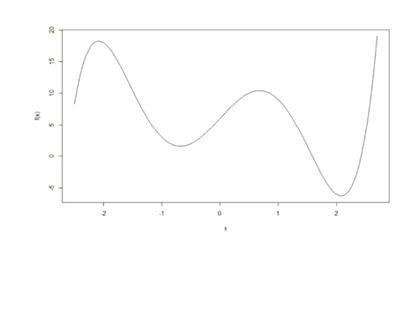

In [33]:
from IPython.display import Image
Image('fig8.png')

In [203]:
def f(x):
    return x**5-8*x**3+10*x+6

In [214]:
x=sp.Symbol('x')
f=x**5-8*x**3+10*x+6
df=f.diff(x)

f=sp.lambdify(x,x**5-8*x**3+10*x+6,'numpy')
derv=sp.lambdify(x,df,'numpy')


In [215]:
f(1)

9

**backtracking line search**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration
    

In [223]:
def backtracking_line_search(f,derv,x,d,alpha=10,p=0.5,beta=1E-4):
    y,g=f(x),derv(x)
    i=1
    while f(x+alpha*d)>y+beta*alpha*np.dot(g,d):
        alpha*=p
        print('%d: alpha= %.4f' %(i,alpha))
        i+=1
        
    return alpha

In [224]:
# abstol 종료 조건 사용

x_=np.array([-2]) # design point
d_=-1*np.array(derv(x_)) #descent direction
alpha=backtracking_line_search(f,derv,x_,d_)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(derv(x_))
    alpha=backtracking_line_search(f,derv,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
1 0.01953125 [1.75] [-2.96191406] [20.96191406]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
2 0.01953125 [2.07432556] [-6.2557296] [3.29381554]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
3 0.01953125 [2.08792431] [-6.25781019] [0.00208059]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
4 0.01953125 [2.08017453] [-6.25844465] [0.00063446]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.

In [229]:
# 초기값 변경, alpha값 변경
# abstol 종료 조건 사용

x_=np.array([1]) # design point
d_=-1*np.array(derv(x_)) #descent direction
alpha=backtracking_line_search(f,derv,x_,d_,alpha=0.5)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(derv(x_))
    alpha=backtracking_line_search(f,derv,x_,d_,alpha=0.5)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 0.2500
2: alpha= 0.1250
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
1 0.015625 [2.125] [-6.18502808] [15.18502808]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
2 0.015625 [2.06907272] [-6.25098826] [0.06596019]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
3 0.015625 [2.08638569] [-6.25832398] [0.00733571]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
4 0.015625 [2.08214901] [-6.25874405] [0.00042007]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
5 0.015625 [2.08327727] [-6.25877417] [3.01224824e-05]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
6 0.015625 [2.08298263] [-6.25877622] [2.04821588e-06]
1: alpha= 0.2500
2: alpha= 0.1250
3: alpha= 0.0625
4: alpha= 0.0312
5: alpha= 0.0156
7 0.015625 [2.08305998] [-6.25877636] [1.41272029e-07]
1: alp

In [218]:
# reltol 종료 조건 사용
# abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)

x_=np.array([-2]) # design point
d_=-1*np.array(derv(x_)) #descent direction
alpha=backtracking_line_search(f,derv,x_,d_)

y_prev=f(x_)

flag=True

i=1
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(derv(x_))
    alpha=backtracking_line_search(f,derv,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
1 0.01953125 [1.75] [-2.96191406] [20.96191406]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
2 0.01953125 [2.07432556] [-6.2557296] [3.29381554]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
3 0.01953125 [2.08792431] [-6.25781019] [0.00208059]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
4 0.01953125 [2.08017453] [-6.25844465] [0.00063446]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.

In [219]:
# maximum iteration 종료 조건

x_=np.array([-2]) # design point
d_=-1*np.array(derv(x_)) #descent direction
alpha=backtracking_line_search(f,derv,x_,d_)

y_prev=f(x_)

flag=True

i=1
max_iter=(15+13)*0.5
while flag:
    x_= x_+alpha*d_
    d_= -1*np.array(derv(x_))
    alpha=backtracking_line_search(f,derv,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_- y_prev)
    print(i,alpha,x_,f(x_),diff)
    
    if i>max_iter:
        flag=False
    
    y_prev=y_
    i+=1

1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
1 0.01953125 [1.75] [-2.96191406] [20.96191406]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
2 0.01953125 [2.07432556] [-6.2557296] [3.29381554]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
3 0.01953125 [2.08792431] [-6.25781019] [0.00208059]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.0781
8: alpha= 0.0391
9: alpha= 0.0195
4 0.01953125 [2.08017453] [-6.25844465] [0.00063446]
1: alpha= 5.0000
2: alpha= 2.5000
3: alpha= 1.2500
4: alpha= 0.6250
5: alpha= 0.3125
6: alpha= 0.1562
7: alpha= 0.

**strong backtracking**  

- 각 종료 조건  

    - 1. abstol: abs(y-y_prev)<1E-8
    - 2. reltol: abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)
    - 3. maximum iteration

In [235]:
def strong_backtracking(f,derv,x,d,alpha=10,beta=1E-4,sigma=1E-1):
    y0,g0,y_prev,alpha_prev=f(x), np.dot(derv(x),d), np.nan, 0.0
    alpha_lo,alpha_hi=np.nan, np.nan
    
    # bracket phase
    while True:
        y=f(x+alpha*d)
        
        if y>y0+beta*alpha*g0 or (not (np.isnan(y_prev)) and y>=y_prev):
            alpha_lo, alpha_hi =alpha_prev, alpha
            break
            
        g=np.dot(derv(x+alpha*d),d)
        
        if np.abs(g) <= -sigma*g0:
            return alpha
        elif g>=0:
            alpha_lo,alpha_hi =alpha,alpha_prev
            break
        
        y_prev,alpha_prev,alpha = y, alpha, 2*alpha
        
    # Zoom phase
    y_lo=f(x+alpha_lo*d)
    
    while True:
        alpha=0.5*(alpha_lo+alpha_hi)
        y=f(x+alpha*d)
        
        if (y>y0+beta*alpha*g0) or (y>=y_lo):
            alpha_hi=alpha
            
        else:
            g=np.dot(derv(x+alpha*d),d)
            
            if abs(g)<= -sigma*g0:
                return alpha
            elif g*(alpha_hi-alpha_lo)>=0.0:
                alpha_hi=alpha_lo
            alpha_lo=alpha

In [238]:
# abstol 종료 조건 사용

x_= np.array([-1])
d_= -1*np.array(derv(x_))
alpha=strong_backtracking(f,derv,x_,d_,alpha=5)
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(derv(x_))
    alpha=strong_backtracking(f,derv,x_,d_,alpha=5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1

1 0.01220703125 [2.07617188] [-6.25688034] [9.25688034]
2 0.01220703125 [2.08288753] [-6.25877538] [0.00189505]
3 0.01220703125 [2.08304171] [-6.25877637] [9.87481773e-07]
4 0.01220703125 [2.08304388] [-6.25877637] [1.95708338e-10]


In [239]:
# 초기값 변경, alpha값 변경
# abstol 종료 조건 사용


x_= np.array([1])
d_= -1*np.array(derv(x_))
alpha=strong_backtracking(f,derv,x_,d_,alpha=5) 
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(derv(x_))
    alpha=strong_backtracking(f,derv,x_,d_,alpha=5)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8:
        flag=False
        
    y_prev=y_
    i+=1


1 0.01220703125 [2.07666016] [-6.2571395] [15.2571395]
2 0.01220703125 [2.08290266] [-6.25877557] [0.00163606]
3 0.01220703125 [2.08304193] [-6.25877637] [8.05654651e-07]
4 0.01220703125 [2.08304389] [-6.25877637] [1.59225522e-10]


In [240]:
# reltol 종료 조건 사용 : abs(y-y_prev)<1E-8*(abs(y_prev)+1E-8)

x_= np.array([-1])
d_= -1*np.array(derv(x_))
alpha=strong_backtracking(f,derv,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(derv(x_))
    alpha=strong_backtracking(f,derv,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if diff<1E-8*(abs(y_prev)+1E-8):
        flag=False
        
    y_prev=y_
    i+=1

1 0.01220703125 [2.07617188] [-6.25688034] [9.25688034]
2 0.01220703125 [2.08288753] [-6.25877538] [0.00189505]
3 0.01220703125 [2.08304171] [-6.25877637] [9.87481773e-07]
4 0.01220703125 [2.08304388] [-6.25877637] [1.95708338e-10]


In [243]:
# maximum iteration 종료 조건 사용

x_= np.array([-1])
d_= -1*np.array(derv(x_))
alpha=strong_backtracking(f,derv,x_,d_) #alpha 초기값 1
#print(alpha,x_,f(x_))

y_prev=f(x_)

max_iter=2
flag=True
i=1
while flag:
    x_=x_+alpha*d_
    d_=-1*np.array(derv(x_))
    alpha=strong_backtracking(f,derv,x_,d_)
    
    y_=f(x_)
    
    diff=np.abs(y_-y_prev)
    print(i,alpha,x_,f(x_),diff)

    if i>max_iter:
        flag=False
        
    y_prev=y_
    i+=1

1 0.01220703125 [2.07617188] [-6.25688034] [9.25688034]
2 0.01220703125 [2.08288753] [-6.25877538] [0.00189505]
3 0.01220703125 [2.08304171] [-6.25877637] [9.87481773e-07]
